# NLO predictions crash course

- Welcome!
- Idea of this tutorial: accompanying tutorial to Jennifer's QCD lectures
- 'crash course': a class in which a lot of information is taught in a short period of time (Encyclopdia Britannica)
- Questions, anything unclear? Please ask any of us anytime!
- Plan for today:
  - write a very simple and short Monte Carlo program and produce LO predictions (Christopher)
  - calculate structure functions and compare with data; improve the theory predictions and see the impact (Felix)
  - Less focus on *why* and more focus on *how*
- For the exercises: if you'd like team up, please do! If you want to solve everything yourself that's also fine!

## Technical information

- Open a terminal and `cd` to your `como-2023` directory that you downloaded yesterday and `git pull` to update it
- Activate the `theory` environment to run this notebook:
  ```
  . envs/theory/bin/activate
  jupyter lab w1t2-nlo-crash-course/w1t2-nlo-crash-course/introduction.ipynb
  ```
- you should now see this notebook!
- we finally need a PDF set with a non-zero photon PDF:

In [35]:
!lhapdf install NNPDF31_nnlo_as_0118_luxqed

NNPDF31_nnlo_as_0118_luxqed.tar.gz:    45.3 MB[100.0%] 


# Motivation: what do we need theory predictions for?

- With the standard model of particle physics, we're often interested in these two tasks:
  1. Extract quantities we can't calculate: If we trust data and theory, we often want to extract quantities that are hard/impossible to calculate! For instance, parton distribution functions (PDFs), see picture below.
  2. Answer: how good is the standard model? To answer this question, we must compare theory predictions with experimental measurements, using (universal!) PDFs as input
  
![fitting PDFs](figures/Fit.png)

- here: theory, other tutorials discuss methodology aspects

# How do we calculate a prediction?

- there's a 'recipe' that we will present
- very complicated to spell out in full detail and generality: if interested attend QFT lectures!
- here: bird's eye view, overview. Introduce terminology so you can talk to theorists!
- important ingredients:
  1. factorization (covered in Jenny's lectures) and
  2. perturbation theory (you should know this from quantum mechanics)
  3. interpolation grids

## 1. Factorization

- Many colliders use bound states: protons (LHC), anti-protons (Tevatron), or heavier nuclei like lead (LHC)
- Bound states are very difficult objects, but if we scatter them off-each other or if we probe them using leptons we usually assume that short-distance dynamics (scattering process) *factorizes* from long-distance dynamics (interaction in the hadron)
- Essentially we're assuming that in the very short moment when the scattering happens the bound states consists of a bunch of non-interacting particles: we call these *partons*
- Partons are the 'parts' of the hadron, and the sum of all partons are the hadron
- In terms of the standard model the partons are elementary particles (quarks $\mathrm{q}$, gluons $\mathrm{g}$, but also photons $\gamma$, leptons $\ell$ and so on), and we can easily calculate with them

### Parton distribution functions (PDFs)

- Rough idea: we can't directly/easily calculate *hadronic* cross sections (hadrons are bound states), but we can calculate *partonic* cross sections
- PDFs $f_a^h (x)$ for a hadron $h$ 'translate' between these to pictures
- $f_a^h (x)$ is the 'probability' of finding a parton $a$ in the hadron $h$ with momentum fraction $x \in [0, 1]$
- for one hadron (for instance HERA):
  $$ \left\langle \frac{\sigma^{h \ell \to F}}{\mathrm{d} \mathcal{O}} \right\rangle = \sum_{a} \int_0^1 \mathrm{d} z f_a^h (z) \frac{\sigma_{ab \to F} (z)}{\mathrm{d} \mathcal{O}} $$
- for two hadrons (for instance LHC):
  $$ \left\langle \frac{\sigma^{hh \to F}}{\mathrm{d} \mathcal{O}} \right\rangle = \sum_{a,b} \int \mathrm{d} x_1 \mathrm{d} x_2 f_a^h (x_1) f_b^h (x_2) \frac{\sigma_{ab \to F} (x_1, x_2)}{\mathrm{d} \mathcal{O}} $$
- PDFs describe the long-distance dynamics, the partonic cross sections the short-distance dynamics
- these are our 'master formulae':
  1. We can calculate the hadronic cross sections $\sigma_{ab \to F} (x_1, x_2)/\mathrm{d} \mathcal{O}$ using the previously determined PDFs
  2. or we use predictions and the corresponding measurements to fit PDFs
- LHAPDF is a library to access the numerical values of PDFs

### Caveats

- PDFs aren't probability distributions in that sense that
  $$ \int_0^1 \mathrm{d} x f_a (x) \neq 1 $$
  and usually the integral isn't convergent: we can find infinitely many partons in the proton
- but the electric charge and the momentum of the hadron is conserved: sum rules

## 2. Perturbation theory: calculating a partonic cross section

- Standard model Lagrangian $\mathcal{L}_\text{SM}$, solve the equations of motion, just like in classical mechanics
- Well, not quite: EOMs are coupled, non-linear differential equations
- A good tool is perturbation theory: divide Lagrangian into free fields + perturbation; alternative: lattice QCD
- In the SM we have the running couplings $\alpha_s (M_\mathrm{Z}^2) = 0.118$ and $\alpha(0) \approx 1/137 \approx 0.0073$
- expand in those two couplings:
  $$ \frac{\sigma_{ab} (x_1, x_2)}{\mathrm{d} \mathcal{O}} = \sum_{n,m} \alpha_\mathrm{s}^n \alpha^m \frac{\sigma_{ab}^{n,m} (x_1, x_2)}{\mathrm{d} \mathcal{O}} $$
- since $\alpha_s \gg \alpha$ we usually look only at the lowest order $m$ and calculate corrections in $n$: QCD corrections
- this isn't always reliable, sometimes electroweak (EW) corrections are needed

## 3. Interpolation grids: predictions independent of their PDFs and strong coupling

Finally, we modify our master formulae a bit:

$$ \left\langle \frac{\sigma^{hh \to F}}{\mathrm{d} \mathcal{O}} \right\rangle = \sum_{a,b} \sum_{n,m} \int \mathrm{d} x_1 \mathrm{d} x_2 f_a^h (x_1) f_b^h (x_2) \alpha_\mathrm{s}^n \alpha^m \frac{\sigma_{ab \to F}^{n,m} (x_1, x_2)}{\mathrm{d} \mathcal{O}} $$

We can approximately construct $\frac{\sigma_{ab \to F}^{n,m} (x_1, x_2)}{\mathrm{d} \mathcal{O}}$ and call that 'interpolation grid'. This has a few advantageous:

- if we want to fit PDFs we by definition need predictions independent of them!
- if we want to make predictions we can easily change PDF sets and compare them with each other

# Leading-order (LO) calculations recipe

Here we'd like to calculate

- the cross section of the production of a same-flavour opposite-sign (SFOS) lepton-pair (also known as Drell-Yan lepton-pair production), for instance muons
- at the LHC: $\mathrm{p}\mathrm{p} \to \ell\bar{\ell}$ @ 7 TeV,
- differentially in the rapidity of the lepton pair,
- in the setup given by <https://arxiv.org/abs/1310.7291>.

We'll write a Monte Carlo integrator that calculates a part of this process and produces an interpolation grid.

## 1. Write down observable definition and master formula

We use the master formula for two incoming protons:

$$ \sigma^{\mathrm{p}\mathrm{p} \to \ell\bar{\ell}} = \sum_{a,b} \int \mathrm{d} x_1 \mathrm{d} x_2 f_a^\mathrm{p} (x_1) f_b^\mathrm{p} (x_2) \sigma_{ab \to \ell\bar{\ell}} (x_1, x_2) $$

For simplicity we restrict ourselves to the photon-photon contribution, so $a, b = \gamma$. We assume that PDFs are given.

## 2. Draw all Feynman diagrams

You need to identify all relevant input states and all valid output states, connect them in all possible ways using the allowed vertices and propagators and assign four-momenta to them.

In our example of photon-photon scattering to SFOS lepton-pair there are two diagrams: one with a $t$-channel propagator and one with a $u$ propagator:
| t | u | 
| :-: | :-: |
| <img src="figures/lo-t.png" width=260 height=260 /> | <img src="figures/lo-u.png" width=260 height=260 /> |

$$ \mathrm{i} \mathcal M_t = \bar u(p_2) (- \mathrm{i} e) \gamma_\mu \frac{\mathrm{i} ( \cancel k_1 - \cancel p_1)}{t} (-\mathrm{i} e) \gamma_\nu u(p_2) \epsilon^\nu (k_1) \epsilon^\mu (k_2) \quad \mathrm{i} \mathcal{M}_u = \bar u(p_2) (-\mathrm{i} e) \gamma_\mu \frac{\mathrm{i} (\cancel k_2 - \cancel p_1)}{u} (- \mathrm{i} e) \gamma_\nu u(p_2) \epsilon^\nu (k_1) \epsilon^\mu (k_2) $$

## 3. Compute matrix elements

Sum all amplitudes and take the modulus squared. It is common practice to also account for the flux factor and the spin and color sums together with their eventual average. Recall to average on the input and to sum on the output.

In our example we find:
$$ \frac {1}{2 s} |\mathcal M_t + \mathcal M_u |^2 = \frac{\alpha_{em}^2}{2s} \left(\frac t u + \frac u t\right) $$

In [1]:
def photon_photon_matrix_element(s: float, t: float, u: float) -> float:
    alpha0 = 1.0 / 137.03599911
    return alpha0 * alpha0 / 2.0 / s * (t / u + u / t)

## 4. Determine phase space decomposition

We need to integrate the squared matrix elements over all possible momenta, that is all momenta which fulfill momentum conservation and which are on-shell: $ p_i^2 = m_i^2 $. This integral (Lorentz invariant phase-space (LIPS)) is:

$$ \int \mathrm{d} \mathrm{LIPS} = \int \left( \prod_{i=1}^n \mathrm{d}^4 p_i \right) \, \delta^{(4)} \left( k_1 + k_2 - \sum_{i=1}^n p_i \right) \prod_{i = 1}^n \delta \left( p_i^2 - m_i^2 \right) $$

and has $4n$ integration dimensions, reduced to $3n - 4$ through the momentum conservation ($-4$) and on-shell conditions ($-n$).

In our example we have two massless final state particles ($n = 2$ and $m_1 = m_2 = 0$), so effectively we integrate over $3n - 4 = 2$ dimensions. We choose to integrate over these two variables:
1. $\cos \theta$, where $\theta$ measures the angle of one of the leptons w.r.t. the beam axis and
2. the angle $\phi$, which is another angle transverse to the beam axis.

Matrix elements do not depend on the angle $\phi$, since the collision is symmetric around the beam axis.

## 5. Compute phase space integrals

We also need to generate the parton fractions, that is the arguments $x_1$ and $x_2$ of the two PDFs. We do this by rewriting the integral into $\tau$, relative centre-of-mass energy squared and $y$, the rapidity relating the hadronic and partonic centre-of-mass frames:

$$ \int_0^1 \mathrm{d} x_1 \int_0^1 \mathrm{d} x_2 = \int \mathrm{d} \tau \int \mathrm{d} y $$

This transformation is chosen such that the jacobian contains a flux factor, cancelling the flux factor multiplied to the squared matrix elements above.

We approximate the integrals numerically by using a Monte Carlo integration, which computes the average of the integrand evaluated using uniformly chosen random numbers $r_1, r_2, r_3$:

$$ \int_0^1 \mathrm{d} r_1 \int_0^1 \mathrm{d} r_2 \int_0^1 \mathrm{d} r_3 f(r_1, r_2, r_3) \approx \frac{1}{N} \sum_{i=1}^N f(r_1^i, r_2^i, r_3^i) $$

Translated to Python code this reads:

In [2]:
from typing import Tuple
import numpy as np


def hadronic_ps_gen(
    mmin: float, mmax: float
) -> Tuple[float, float, float, float, float, float]:
    r"""Hadronic phase space generator.

    Parameters
    ----------
    mmin :
        minimal partonic centre-of-mass energy :math:`\sqrt{s_{min}}`
    mmax :
        maximal partonic centre-of-mass energy :math:`\sqrt{s_{max}}`

    Returns
    -------
    s :
        Mandelstam s
    t :
        Mandelstam t
    u :
        Mandelstam u
    x1 :
        first momentum fraction
    x2 :
        second momentum fraction
    jacobian :
        jacobian from the uniform generation

    """
    smin = mmin * mmin
    smax = mmax * mmax

    r1 = np.random.uniform()
    r2 = np.random.uniform()
    r3 = np.random.uniform()
    
    # generate partonic x1 and x2
    tau0 = smin / smax
    tau = pow(tau0, r1)
    y = pow(tau, 1.0 - r2)
    x1 = y
    x2 = tau / y
    s = tau * smax

    jacobian = tau * np.log(tau0) * np.log(tau0) * r1

    # theta integration (in the CMS)
    cos_theta = 2.0 * r3 - 1.0
    jacobian *= 2.0

    # reconstruct invariants (in the CMS)
    t = -0.5 * s * (1.0 - cos_theta)
    u = -0.5 * s * (1.0 + cos_theta)

    # phi integration
    jacobian *= 2.0 * np.math.acos(-1.0)

    return [s, t, u, x1, x2, jacobian]

Now we can test the integration by generating a phase-space point between $s_\text{min} = (10~\text{GeV})^2$ and $s_\text{max} = (7000~\text{GeV})^2$ (our proton beam energy):

In [3]:
tuple = hadronic_ps_gen(10.0, 7000.0)
print(tuple)
print("s + t + u =", tuple[0] + tuple[1] + tuple[2])

[1836075.5994247776, -1345852.3886075218, -490223.2108172558, 0.18470191565866487, 0.20287245244252453, 20.261682975108094]
s + t + u = 0.0


## 6. Join phase space integration and matrix elements

Finally, we have to
- put the integral together with the squared matrix elements,
- transform the phase-space variables into the well-known LAB quantities, and
- we want to simulate the setup from CMS DY 7 TeV, see: <https://arxiv.org/abs/1310.7291>

This means, we
- add phase-space cuts:
  - $ p_\mathrm{T}^\ell > 14~\text{GeV} $
  - $ y_\mathrm{T}^\ell < 2.4 $
  - $ 60~\text{GeV} < M_{\ell\bar{\ell}} < 120~\text{GeV} $
- and we want the differential cross section w.r.t. $y_{\ell\bar{\ell}}$, with bin limits from $0$ to $2.4$, in steps of $0.1$.

In [40]:
import pineappl

def fill_grid(grid: pineappl.grid.Grid, calls: int):
    """Fill grid with points."""

    # in GeV^2 pbarn
    hbarc2 = 389379372.1

    # perform Monte Carlo sum
    for _ in range(calls):
        # compute phase space
        s, t, u, x1, x2, jacobian = hadronic_ps_gen(10.0, 7000.0)
        # build observables
        ptl = np.sqrt((t * u / s))
        mll = np.sqrt(s)
        yll = 0.5 * np.log(x1 / x2)
        ylp = np.abs(yll + np.math.acosh(0.5 * mll / ptl))
        ylm = np.abs(yll - np.math.acosh(0.5 * mll / ptl))

        jacobian *= hbarc2 / calls

        # cuts for LO for the invariant-mass slice containing the
        # Z-peak from CMS (7 TeV): https://arxiv.org/abs/1310.7291
        if (
            ptl < 14.0
            or np.abs(yll) > 2.4
            or ylp > 2.4
            or ylm > 2.4
            or mll < 60.0
            or mll > 120.0
        ):
            continue

        # build event
        weight = jacobian * photon_photon_matrix_element(s, u, t)
        # set factorization and renormalization scale to (roughly) the Z-boson mass
        q2 = 90.0 * 90.0
    
        # fill the interpolation grid
        grid.fill(x1, x2, q2, 0, np.abs(yll), 0, weight)

We want our results stored in an interpolation grid, which is independent of PDFs and the strong coupling. To create a `Grid`, we need to give it a few bits of information:

- our initial state is photon-photon, or in PDG Monte Carlo IDs `(22, 22)`
- the perturbative order in $alpha^2$
- as per CMS's setup we bin the observable from $0$ to $2.4$ in steps of $0.1$.

In [41]:
def generate_grid(calls: int) -> pineappl.grid.Grid:
    """Generate the grid."""
    # create a new luminosity function for the $\gamma\gamma$ initial state
    lumi_entries = [pineappl.lumi.LumiEntry([(22, 22, 1.0)])]
    # only LO $\alpha_\mathrm{s}^0 \alpha^2 \log^0(\xi_\mathrm{R}) \log^0(\xi_\mathrm{F})$
    orders = [pineappl.grid.Order(0, 2, 0, 0)]
    bins = np.arange(0, 2.4, 0.1)
    params = pineappl.subgrid.SubgridParams()
    grid = pineappl.grid.Grid.create(lumi_entries, orders, bins, params)

    # fill the grid with phase-space points
    print(f"Generating {calls} events, please wait...")
    fill_grid(grid, calls)
    print("Done.")

    return grid

We have play a bit with the Monte Carlo statistics, to produce smooth results. To generate a full theory predictions, we must also use our master formula and convolute the interpolation grid with the two photon PDFs. Finally, let's plot the result:

Generating 1000 events, please wait...
Done.
LHAPDF 6.5.3 loading /home/cschwan/prefix/share/LHAPDF/NNPDF31_nnlo_as_0118_luxqed/NNPDF31_nnlo_as_0118_luxqed_0000.dat
NNPDF31_nnlo_as_0118_luxqed PDF set, member #0, version 2; LHAPDF ID = 325100
[0.56703915 0.3960687  0.         0.27254646 0.33954418 0.92326745
 0.19073001 0.13408917 0.53563844 0.45272596 0.30158341 0.08801242
 0.25689996 0.04298492 0.05050359 0.26247444 0.43741681 0.14254998
 0.         0.08026173 0.         0.         0.22122904 0.22122904]


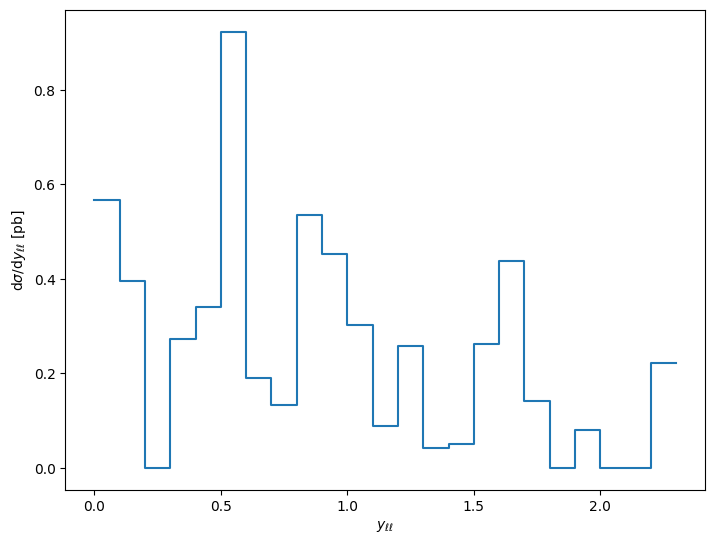

In [39]:
import lhapdf

# generate interpolation grid
grid = generate_grid(1000)

# perform convolution with PDF
pdf = lhapdf.mkPDF("NNPDF31_nnlo_as_0118_luxqed", 0)
bins = grid.convolute_with_one(2212, pdf.xfxQ2, pdf.alphasQ2)
bins = np.append(bins, bins[-1])

from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel("$y_{\ell\ell}$")
ax.set_ylabel("$\mathrm{d} \sigma / \mathrm{d} y_{\ell\ell}$ [pb]")
ax.step(np.arange(0.0, 2.4, 0.1), bins, where='post')
print(bins)

## Final words

This was only a piece of a full calculation. We'd also need to calculate:

- quark-anti-quark initial-states, $q\bar{q} \to \ell\bar{\ell}$, which are large
- for reliable theory predictions, we should also calculate NLO and NNLO QCD predictions
- if we scan the invariant mass range of Drell-Yan, we should also calculate NLO electroweak corrections ($\alpha^3$).

# Next-to-leading-order (NLO) calculations recipe modifications

Our considerations so far are dealing with an leading-order calculation - what changes if we go to higher perturbative orders? In order to investigate this let's consider a simpler example than Drell-Yan: the computation of DIS structure functions. Although this calculation is conceptionally much simpler it turns out that higher-order corrections bring a whole new level of complications at any level of our algorithm. We will thus refrain from giving all details, but instead try to convey the most relevant ideas.

## 2. Draw all Feynman diagrams

At LO DIS there is a single diagram:

| LO |  
| :-: | 
| <img src="figures/lo-light.png" width=200 height=200 /> |

Starting at next-to-leading order (NLO) we need to consider three genuinely new types of diagrams: virtual corrections, real emissions and new partonic channels. Let's discuss them in turn, next.

### Virtual corrections

- one can add loops inside diagrams
- the loop momentum can be whatever and thus needs to be integrated
- calculating loops is an industry on it's own
- the difficulty raises with the number of loops and participating masses
- there is a lot of math involved here: Group theory, algebras, function theory, special functions, complex analysis (what ever)
- for DIS there is 1 virtual diagram: people refer to this as triangle
- the triangle is one of the simplest loop intragrals and it is given by http://qcdloop.web.cern.ch/qcdloop/
- they contain soft poles, in the example here: this corresponds to this propagator here
- you need to find a way to deal with this pole -> in DR it manifests as $1/\epsilon$

### Real emission of gluons

- gluons can be emitted of any quark line in any point in the diagram
- in DIS there are two diagrams
- radiated gluons generate soft and/or collinear poles and they can even overlap
- for DIS this corresponds to this propagator

### New partonic channels

- you need to consider also the case of new initial state partons
- in DIS at NLO there is a new channel opening: gluon

### Coming back to the bigger picture

- the number of diagrams grows typically with factorial
- sooner or later you need an automatic program to do the job for you: e.g. qgraf or FeynArts
- actually "drawing" is not really neede as long as you have a way to iterate them

## 3. Compute all matrix elements

- one has to square the sum of all Feynman diagrams (recall they grow factorial)
- this results in a list of Dirac traces
- one can solve those analytically (using Dirac algebra), but this is only possible for a small number of matrix elements
- else one has to find a numerical implementation, typically relying on some explicit representation of the spinors and their associated helicities
- the soft and collinear structure of matrix elements can be predicted (and checked) a priori
- for the case of NLO DIS we get solve the traces by hand and get these matrix elements: see `notes27-dis-nlo.pdf`
- Note the appearence of color factors, pis, Gamma functions, poles in epsilon, scale^epsilon

## 4. Determine phase space decomposition

- find the maximum number of phase space constraints
- find a suitable representation for all parton momenta
- phase space integrals regularly involve the [Källén function](https://en.wikipedia.org/wiki/K%C3%A4ll%C3%A9n_function) and d-dimensional spheres

## 5. Compute phase space integrals

- computing phase space integrals has a (close) connection to loop integrals
- phase space integrals can be computed numerically using Monte Carlo techniques (as in our example), but at higher order the kinematics is getting more involved
- for the case of NLO DIS we need the 2-to-2 particle phase space which we can write as: see `notes27-ps.pdf`

## 6. Join phase space and matrix elements

- this requires an siginifcant amount of book keeping
- soft + virtual have to cancel against each other
- observable definitions have to be infrared safe
- collinear poles have to cancel with the proper PDF definition
- remember cuts and observable definitions